In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv(r"/Users/kandy/Downloads/framingham.csv")

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.shape

(4240, 16)

In [10]:
df.drop(columns = ["education"], axis = 1, inplace = True)

In [11]:
df.shape

(4240, 15)

In [12]:
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].median())
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].mean())
df["totChol"] = df["totChol"].fillna(df["totChol"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
df["heartRate"] = df["heartRate"].fillna(method = "ffill")
df["glucose"] = df["glucose"].fillna(df["glucose"].median())

In [13]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

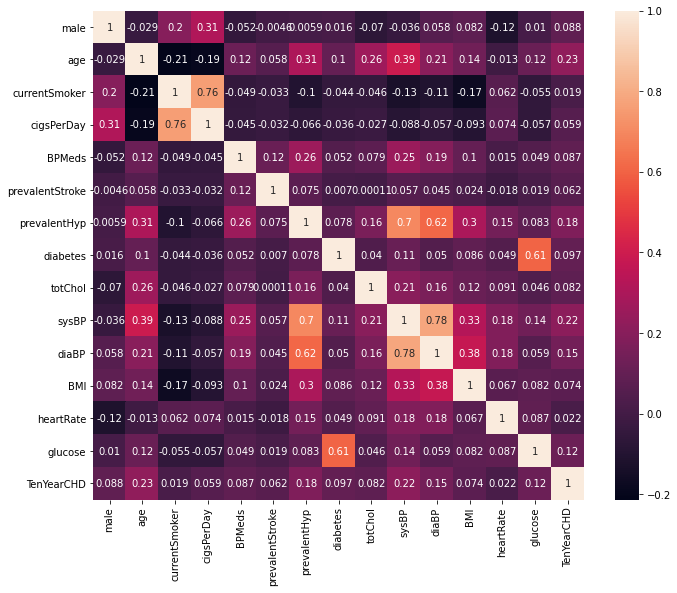

In [14]:
plt.subplots(figsize = (11, 9))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the heatmap above we can see a positive correlation between diabetes and glucose. meaning the
higher the glucose level the higher your chances of having diabetes.

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

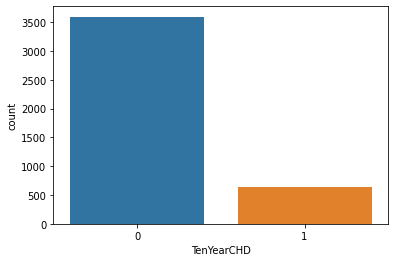

In [15]:
sns.countplot(data = df, x = "TenYearCHD")

From the diagram above we can see that the number of people that have coronary heart disease is fewer
than the number of those that dont have it.This shows an imbalance dataset.

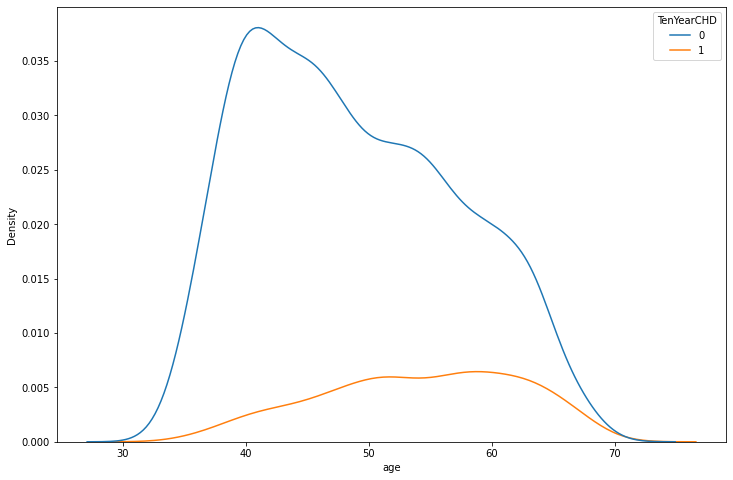

In [16]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x = "age", hue = "TenYearCHD")
plt.show()

From the diagram above people within the age of 30 to 40 did not really have the coronary heart disease.
people within the age of 50 - 60 really had the disease.

<AxesSubplot:xlabel='diabetes', ylabel='TenYearCHD'>

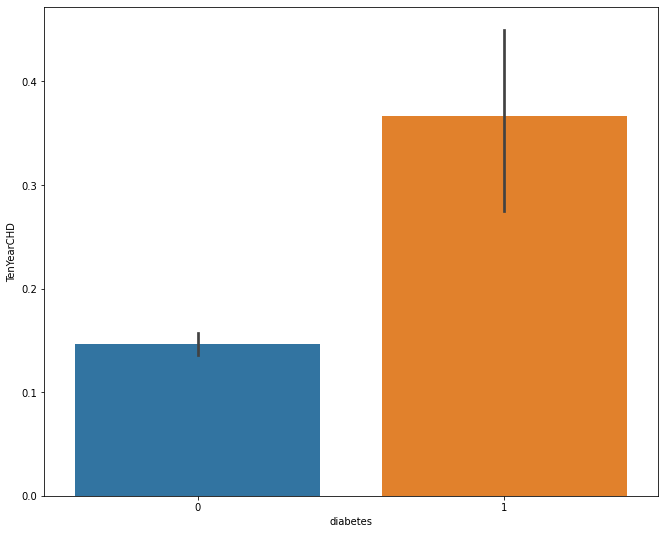

In [17]:
plt.subplots(figsize = (11,9))
sns.barplot(data = df, x = "diabetes", y = "TenYearCHD")

From the diagram above, you can see that people with diabetes tend to have the coronary heart disease more.

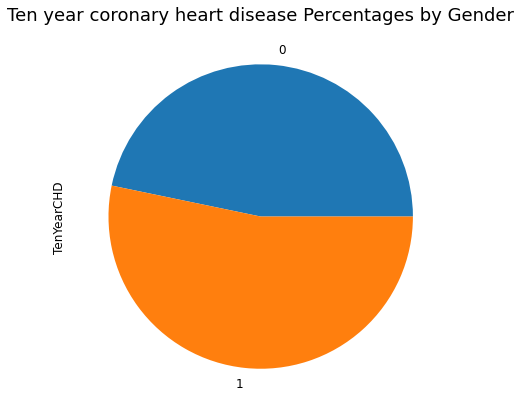

In [18]:
plt.rc('font', size=12)
plt.rc('axes', titlesize=18)


plt.figure(figsize=(10,7))
df['TenYearCHD'].groupby(df['male']).sum().plot(kind='pie')
#plt.axis('equal')
plt.title("Ten year coronary heart disease Percentages by Gender")
plt.show()

In [19]:
X = df.loc[:, df.columns != "TenYearCHD"]
y= df["TenYearCHD"]

In [20]:
X.shape

(4240, 14)

In [21]:
sc_X = StandardScaler()
scaled_x = sc_X.fit_transform(X)

In [22]:
scaled_x

array([[ 1.15311332, -1.23428297, -0.98827627, ...,  0.28769301,
         0.34294173, -0.20128686],
       [-0.86721746, -0.41766419, -0.98827627, ...,  0.72009414,
         1.59050187, -0.2450359 ],
       [ 1.15311332, -0.18434454,  1.01186281, ..., -0.11276941,
        -0.07291165, -0.50753015],
       ...,
       [-0.86721746,  0.28229477, -0.98827627, ..., -1.06356055,
         0.34294173,  1.11118437],
       [ 1.15311332, -1.11762315, -0.98827627, ..., -0.04889197,
        -0.73827706, -0.42003207],
       [-0.86721746, -1.23428297,  1.01186281, ..., -1.20114273,
         0.75879511, -0.07003974]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.25, random_state = 42)

In [24]:
log = LogisticRegression()

In [25]:
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = log.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
accuracy_score(y_test, y_pred)

0.8603773584905661

In [29]:
confusion_matrix(y_test, y_pred)

array([[895,  10],
       [138,  17]], dtype=int64)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
prediction = model.predict(X_test)

In [34]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
accuracy_score(y_test, prediction)

0.7537735849056604

In [36]:
confusion_matrix(y_test, prediction)

array([[771, 134],
       [127,  28]], dtype=int64)

HYPER PARAMETER TUNING

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
n_estimators=[int (x) for x in np.linspace(start=200, stop = 2000, num = 10)]
max_depth = [int (x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
random_grid = {"n_estimators": n_estimators,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "criterion":["entropy", "gini"]}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [40]:
rfc = RandomForestClassifier()

In [41]:
rf_randomcv = RandomizedSearchCV(estimator = rfc, param_distributions= random_grid, n_iter = 100, cv = 3,verbose = 2,random_state = 100, n_jobs = -1)

In [42]:
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [43]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_depth': 670,
 'criterion': 'gini'}

In [44]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [45]:
best_random_grid = rf_randomcv.best_estimator_

In [46]:
y_predict = best_random_grid.predict(X_test)

In [47]:
accuracy_score(y_test, y_predict)

0.8584905660377359

In [48]:
confusion_matrix(y_test,y_predict)

array([[905,   0],
       [150,   5]], dtype=int64)

HANDLING IMBALANCE DATASET USING SMOTETOMEK

In [49]:
from imblearn.combine import SMOTETomek

In [63]:
from collections import Counter

In [52]:
os = SMOTETomek(0.5)

In [54]:
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

In [65]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes before fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 2691, 1: 489})
The number of classes before fit Counter({0: 2650, 1: 1304})


In [55]:
classifier = RandomForestClassifier()

In [56]:
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [57]:
y_predict = classifier.predict(X_test)

In [58]:
accuracy_score(y_test, y_predict)

0.8273584905660377

In [59]:
confusion_matrix(y_test,y_predict)

array([[850,  55],
       [128,  27]], dtype=int64)

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       905
           1       0.33      0.17      0.23       155

    accuracy                           0.83      1060
   macro avg       0.60      0.56      0.57      1060
weighted avg       0.79      0.83      0.80      1060



HANDLING IMBALANCE DATASET USING RANDOMOVERSAMPLER

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
osp = RandomOverSampler(0.75)

In [80]:
X_train_ns, y_train_ns = osp.fit_resample(X_train, y_train)

In [71]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes before fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 2691, 1: 489})
The number of classes before fit Counter({0: 2691, 1: 2018})


In [72]:
classifiers = RandomForestClassifier()

In [73]:
classifiers.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [74]:
y_predicts = classifiers.predict(X_test)

In [76]:
accuracy_score(y_test, y_predicts)

0.8462264150943396

In [77]:
confusion_matrix(y_test,y_predicts)

array([[878,  27],
       [136,  19]], dtype=int64)

In [78]:
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       905
           1       0.41      0.12      0.19       155

    accuracy                           0.85      1060
   macro avg       0.64      0.55      0.55      1060
weighted avg       0.80      0.85      0.81      1060

